In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
from IPython.display import display
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For Data Augmentation

In [21]:
def load_dataset(path):
    # Define the List for Images & Labels
    Images , Labels = [] , []
    
    label = 0
    # Iterate the Dataset with the Folders
    for folderName in os.listdir(path):
        # Create the New Path for the Images
        imagesPath = os.path.join(path , folderName)
        # Iterate the Each Folder Images
        for images in os.listdir(imagesPath):
            # Define the Path of the Image
            imagePath = os.path.join(imagesPath , images)
            # Read the Image with PIL 
            pilImage = Image.open(imagePath)
            
            # Resize the Image
            resizedImage = pilImage.resize((150,150))
            
             # Convert the Numpy Array
            cv2Image = np.array(resizedImage)
            
             # Change the Type of the Image
            cv2Image = cv2Image.astype("float32")
            
            # Normalize the Data of Image
            cv2Image = cv2Image / 255
            
            # Append the Images and Labels in the List
            Images.append(cv2Image)
            Labels.append(label)
        label += 1
    return Images , Labels

In [22]:
# Define the Path of the Dataset
datasetPath = "C:\\Users\\Abdul\\Desktop\\ID Card Dataset"

# Load the Dataset
Images , Labels = load_dataset(datasetPath)

# Display the Shapes of the Images and Labels
print(f"Shape of the Images is : {np.shape(Images)}")
print(f"Shape of the Labels is : {np.shape(Labels)}")

Shape of the Images is : (173, 150, 150, 3)
Shape of the Labels is : (173,)


In [23]:
# Convert the Images and Labels into Numpy Array
Images = np.array(Images)
Labels = np.array(Labels)

# Display the Shape of the Images and Labels
print(f"Shape of the Images is : {Images.shape}")
print(f"Shape of the Labels is : {Labels.shape}")

Shape of the Images is : (173, 150, 150, 3)
Shape of the Labels is : (173,)


In [24]:
# Define the Labels 
def class_label(index):
    label = ['Black Back Ripped', 'Black Back Image', 'Black Back Markers', 'Black Back Picture-In-Picture', 'Black Front Ripped', 
           'Black Front Image', 'Black Front Markers', 'Black Front Picture-In-Picture', 'Color Back Ripped', 'Color Back Image', 
           'Color Back Markers', 'Color Back Picture-In-Picture', 'Color Front Markers', 'Color Front Image', 'Color Front Picture-in-Picture', 
           'Color Front Ripped', 'Original Back Image', 'Orignal Front Image']
    return label[index]


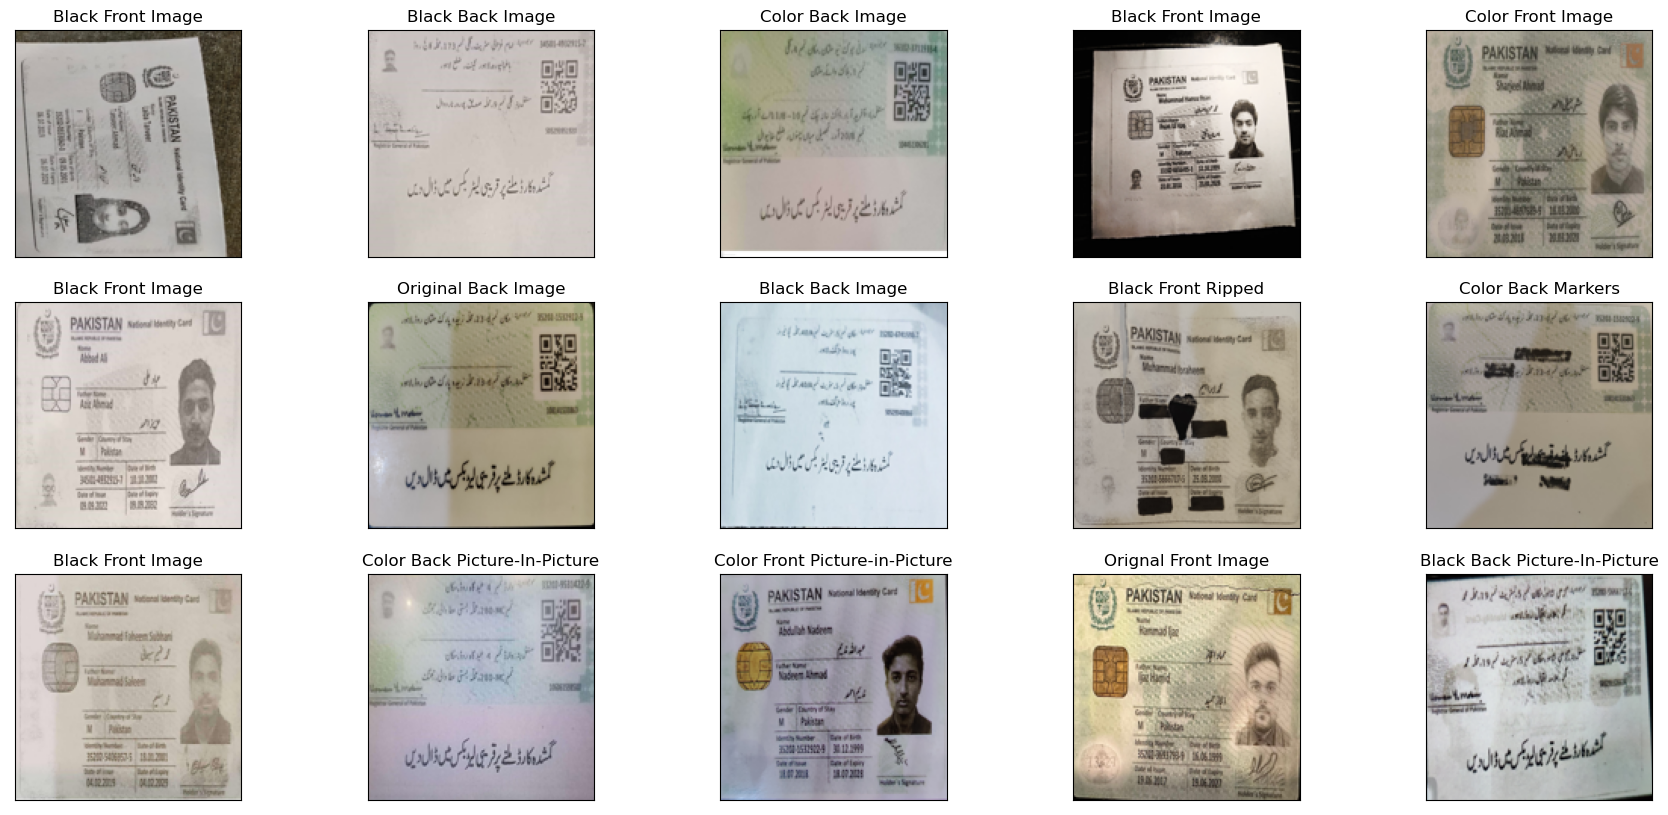

In [25]:
# Visualization Images and Labels

# Set the Figure 
plt.figure(figsize = (22,10))
for index in range(0,15):
    # Get the Radom Number
    choice = random.randint(0, len(Images)-1)
    ax = plt.subplot(3,5,index+1)
    plt.imshow(Images[choice])
    plt.xticks([])
    plt.yticks([])
    plt.title(class_label(Labels[choice]))
plt.show()

In [26]:
# Create Object of the ImageDataGenerator
trainDatagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="constant",
    cval = 125
)

In [39]:
# Creating the Dataset with Directory
trainGenerator = trainDatagen.flow_from_directory(
    directory = "C:\\Users\\Abdul\\Desktop\\ID Card Dataset", 
    batch_size = 16, 
    target_size = (150,150), 
    save_prefix = "shape", 
    save_format = "jpg")

Found 173 images belonging to 18 classes.


In [40]:
# Define the Augmented Dataset
augImages , augLabels =  [] , []

In [41]:
output_dir = 'C:\\Users\\Abdul\\Desktop\\ID-Augmentation\\Augmented-Data'

# Define the class names
class_names = ['Black Back Ripped', 'Black Back Image', 'Black Back Markers', 'Black Back Picture-In-Picture', 'Black Front Ripped',
               'Black Front Image', 'Black Front Markers', 'Black Front Picture-In-Picture', 'Color Back Ripped', 'Color Back Image',
               'Color Back Markers', 'Color Back Picture-In-Picture', 'Color Front Markers', 'Color Front Image', 'Color Front Picture-in-Picture',
               'Color Front Ripped', 'Original Back Image', 'Original Front Image']

count = 0
for inputs, labels in trainGenerator:
    for index in range(len(inputs)):
        image = inputs[index]
        label = labels[index]

        # Convert the Image Type into Uint8 & PIL Format
        image_uint8 = (image * 255).astype(np.uint8)

        # Save the Augmented Images in the Folder
        class_name = class_names[np.argmax(label)]
        class_dir = os.path.join(output_dir, class_name)
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)

        file_path = os.path.join(class_dir, f'Image{count}.jpg')
        cv2.imwrite(file_path, image_uint8)

        augImages.append(image_uint8)
        augLabels.append(label)

        count += 1
        if count == 1000:
            break

    if count == 1000:
        break


In [42]:
# Display the Shape of the Images 
print(f"Shape of the Augmented Images is : {np.shape(augImages)}")
print(f"Shape of the Augmented Labels is : {np.shape(augLabels)}")

Shape of the Augmented Images is : (1000, 150, 150, 3)
Shape of the Augmented Labels is : (1000, 18)


In [43]:
# Convert the Numpy Array
augImages = np.array(augImages)
augLabels = np.array(augLabels)

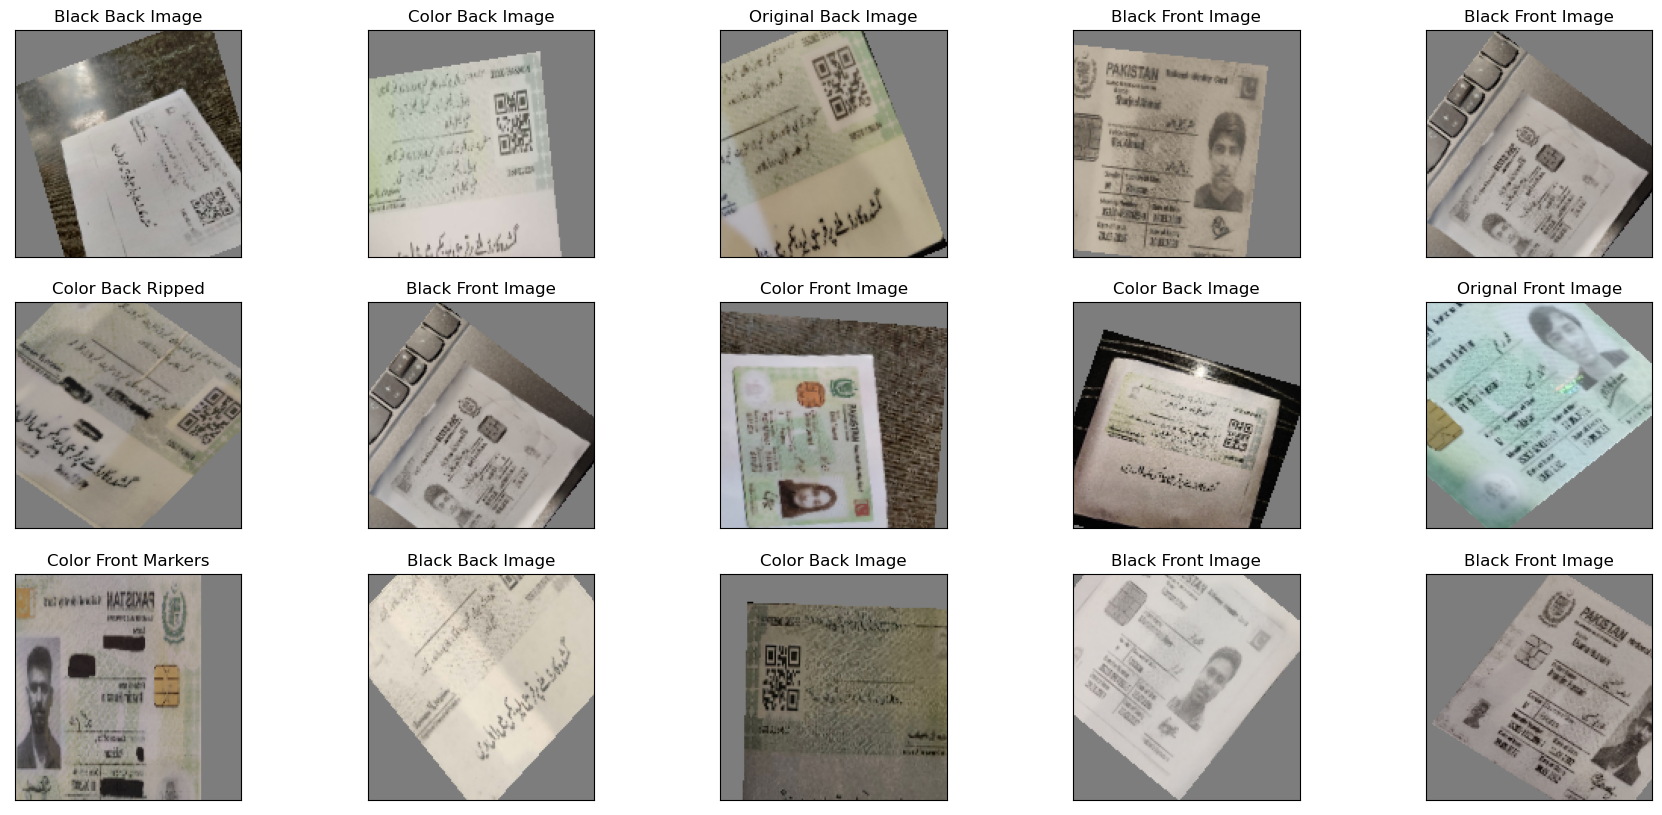

In [44]:
# Visualization Images and Labels

# Set the Figure 
plt.figure(figsize = (22,10))
for index in range(0,15):
    # Get the Radom Number
    choice = random.randint(0, len(Images)-1)
    ax = plt.subplot(3,5,index+1)
    plt.imshow(augImages[choice])
    plt.xticks([])
    plt.yticks([])
    plt.title(class_label(np.argmax(augLabels[choice])))
plt.show()